In [1]:
def converdate(date):
    str1=str(date)
    yearstr=str1[:3]
    realyear=str(int(yearstr)+ 1911 ) #轉為西元年
    realdate=realyear+ str1[4:6] + str1[7:9]
    return realdate

In [2]:
def twodigit(n):
    if n<10:
        restr='0'+str(+n)
    else:
        restr=str(n)
    return restr
# urlbase='https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=2021'
# urltail='01&stockNo=2002&_=1610710136802'  #2002為股票代碼
# for i in range(1,13):
#     url_twse=urlbase + twodigit(i) + urltail
#     print(url_twse)

<AxesSubplot:xlabel='日期'>

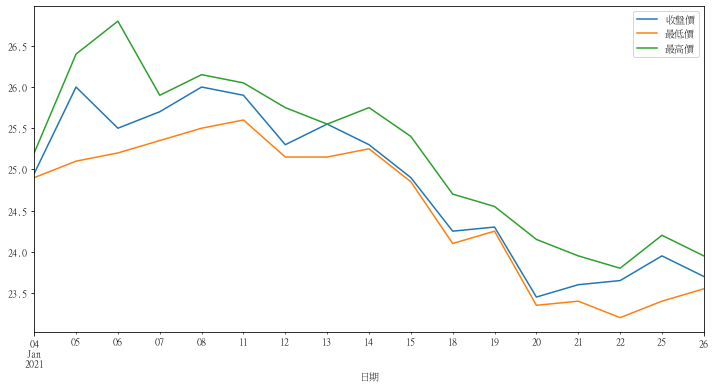

In [3]:
#單一個月，如已有檔案，需先刪掉
import requests
import json, csv
import os
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"]="mingliu"
plt.rcParams["axes.unicode_minus"]=False

pd.options.mode.chained_assignment=None

filepath='stockmonth01.csv'

if not os.path.isfile(filepath):
    url_twse='https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=20210126&stockNo=2002&_=1610710136802'
    res=requests.get(url_twse)
    jdata=json.loads(res.text)
    
    outputfile=open(filepath,'w',newline='',encoding='utf-8')
    outputwriter=csv.writer(outputfile)
    outputwriter.writerow(jdata['fields'])
    for dataline in (jdata['data']):
        outputwriter.writerow(dataline)
    outputfile.close()
    
pdstock=pd.read_csv(filepath,encoding='utf-8')
for i in range(len(pdstock['日期'])):
    pdstock['日期'][i]=converdate(pdstock['日期'][i])
pdstock['日期']=pd.to_datetime(pdstock['日期'])
pdstock.plot(kind='line', figsize=(12,6), x='日期',y=['收盤價','最低價','最高價'])


<AxesSubplot:xlabel='日期'>

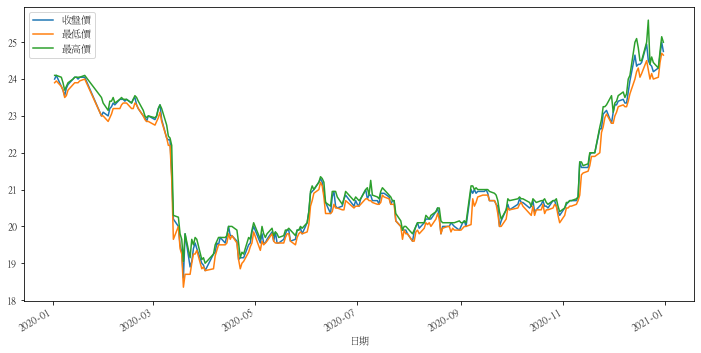

In [4]:
#年度走勢，如已有檔案，需先刪掉
import requests
import json, csv
import os
import time
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"]="mingliu"
plt.rcParams["axes.unicode_minus"]=False

pd.options.mode.chained_assignment=None

urlbase='https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=2020'
urltail='01&stockNo=2002&_=1610761033087'

filepath='stockyear.csv'

if not os.path.isfile(filepath):
    for i in range(1,13):
        url_twse=urlbase + twodigit(i) + urltail
        res=requests.get(url_twse)
        jdata=json.loads(res.text)
        
        outputfile=open(filepath,'a',newline='',encoding='utf-8')
        outwriter=csv.writer(outputfile)
        if i ==1:
            outwriter.writerow(jdata['fields'])
        for dataline in (jdata['data']):
            outwriter.writerow(dataline)
        time.sleep(0.5)
    outputfile.close()

pdstock=pd.read_csv(filepath,encoding='utf-8')
for i in range(len(pdstock['日期'])):
    pdstock['日期'][i]=converdate(pdstock['日期'][i])
pdstock['日期']=pd.to_datetime(pdstock['日期'])
pdstock.plot(kind='line', figsize=(12,6), x='日期',y=['收盤價','最低價','最高價'])

In [5]:
from plotly.graph_objs import Scatter,Layout
from plotly.offline import plot

In [6]:
data=[
    Scatter(x=pdstock['日期'],y=pdstock['收盤價'],name='收盤價'),
    Scatter(x=pdstock['日期'],y=pdstock['最低價'],name='最低價'),
    Scatter(x=pdstock['日期'],y=pdstock['最高價'],name='最高價')
]
plot({'data':data, 'layout':Layout(title='2020年個股統計')},auto_open=True)

'temp-plot.html'